# Prosper Loan Analytics
by Satyam Chauhan

## Introduction

<img src="img.jpeg" alt="Drawing" style="width: 600px;"/>

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The idea to analyze various features and generate informative visuals. It would be interesting to see how certain feature influence borrowers APR or what's the most popular purpose for loan etc. 

## Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
loan.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
loan.shape

(113937, 81)

In [7]:
loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
76509,66253598819993752EF38D2,1117989,2014-01-06 12:44:29.670000000,NaN,36,Current,NaN,0.08496,0.0716,0.0616,...,-12.74,0.00,0.00,0.00,0.00,1.0,0,0,0.0,303
14083,18E535082748561233F7949,493728,2011-02-14 17:15:55.600000000,NaN,36,Completed,2014-02-24 00:00:00,0.29510,0.2599,0.2499,...,-34.36,0.00,0.00,0.00,0.00,1.0,0,0,0.0,37
19305,AAC63526510997402278747,526452,2011-09-09 08:41:51.253000000,NaN,60,Completed,2013-05-31 00:00:00,0.20436,0.1899,0.1799,...,-165.07,0.00,0.00,0.00,0.00,1.0,0,0,0.0,171
61244,C9FC35367217211390EFBDB,550054,2012-01-09 06:42:05.763000000,NaN,36,Past Due (91-120 days),NaN,0.35797,0.3177,0.3077,...,-55.92,0.00,0.00,0.00,0.00,1.0,0,0,0.0,29
74292,445833997415072149B5460,202512,2007-09-16 16:31:53.803000000,B,36,Defaulted,2008-11-26 00:00:00,0.19730,0.1900,0.1800,...,-50.46,-1401.45,8331.39,4798.04,2074.65,1.0,0,0,0.0,216
4682,99203549144495730F55E49,600586,2012-06-16 16:16:13.297000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-54.17,0.00,0.00,0.00,0.00,1.0,0,0,0.0,4
25931,CF0135705925658971F1A5F,708419,2013-02-05 14:51:31.927000000,NaN,36,Current,NaN,0.13697,0.1089,0.0989,...,-172.91,0.00,0.00,0.00,0.00,1.0,0,0,0.0,383
40594,149B35832716344717F7B92,828437,2013-07-04 14:45:46.143000000,NaN,60,Current,NaN,0.33040,0.3032,0.2932,...,-23.03,0.00,0.00,0.00,0.00,1.0,0,0,0.0,37
49211,6B3B33652836373989B63A6,27862,2006-07-31 13:02:30.090000000,E,36,Defaulted,2007-03-05 00:00:00,0.29776,0.2900,0.2850,...,-3.44,0.00,3324.32,3324.33,0.00,1.0,0,0,0.0,35
19551,650F35682605702780303FA,700403,2013-01-17 07:13:38.913000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-38.42,0.00,0.00,0.00,0.00,1.0,0,0,0.0,69


### What is the structure of your dataset?

> The data set has 81 columns and 113937 observations 

### What is/are the main feature(s) of interest in your dataset?

> There are many interesting features but the features that I have focused on are 
    1. Income Range
    2. Borrower APR
    3. Home Ownership
    4. Loan Status 
    5. Term
    6. Loan Amount
    7. Credit Rating
    8. Professions
    9. Loan Type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All the above features help in investigating feature of interest for a visualization

## Univariate Exploration

### Visualization 1

In [8]:
#Creating proportions
status = loan['LoanStatus'].value_counts()
status_order = status.index
#returns sum of all not null values in LoanStatus
n_status = status.sum()
max_loan_count=status.max()
max_loan_status = max_loan_count/n_status

In [9]:
#Use numpy.arange() function to produce a set of evenly spaced proportioned values
tick_props = np.arange(0,max_loan_status, 0.10)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.10', '0.20', '0.30', '0.40']

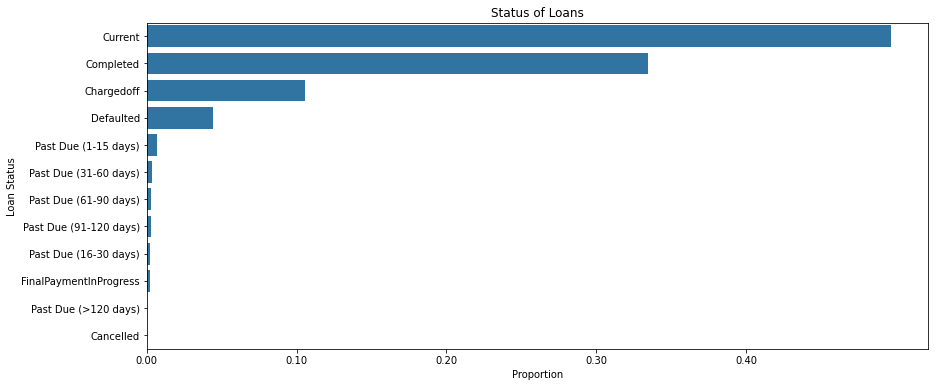

In [10]:
#creating a vertical bar chart to visualize loan status variable
#freq for ordering of the categories 
#base color to keep the bar in same color 
plt.figure(figsize=[14,6])
freq= loan['LoanStatus'].value_counts()
gen_order=freq.index
base_color = sb.color_palette()[0]
sb.countplot(data=loan, y = 'LoanStatus', color=base_color, order=gen_order);
plt.title('Status of Loans')
plt.xlabel('Proportion')
plt.xticks(tick_props * n_status, tick_names)
plt.ylabel('Loan Status');

This graph shows us the breakdown of the loan status categories

### Visualization 2

#### Data Wrangling Step

In [11]:
#Adding credit score column by taking an average of the credit columns
loan['credit_score'] = (loan['CreditScoreRangeLower']+loan['CreditScoreRangeUpper'])/2
loan['credit_score'] = loan['credit_score'].round(decimals=0)
loan['credit_score'] = loan['credit_score'].fillna(0)
loan = loan.astype({'credit_score':'int64'})

In [12]:
#Adding a credit categorical column based on fico score categories
def credit_score_rating():
    credit_score_rating =[]

    for value in loan['credit_score']:
        if 300 <= value <= 580:
            credit_score_rating.append('Poor')
        elif 580 <= value <= 680:
            credit_score_rating.append('Fair')
        elif 680 <= value <= 740:
            credit_score_rating.append('Good')
        elif 740 <= value <= 800:
            credit_score_rating.append('Very Good')
        elif 800 <= value <= 850:
            credit_score_rating.append('Exceptional')
        elif value == 0:
            credit_score_rating.append('None')
        else:
            credit_score_rating.append('Very Poor')
    loan['credit_score_rating'] = credit_score_rating
#Caliing the function
credit_score_rating()

#### Plotting Vizualization 2

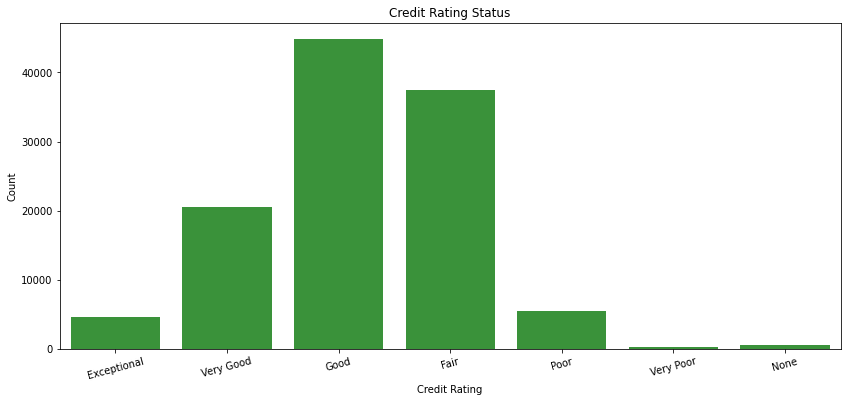

In [13]:
#Creating a donut plot to visualize the credit score categories
#Sorting the rating from good to poor
sorted_rating = ['Exceptional','Very Good','Good', 'Fair', 'Poor','Very Poor', 'None']
cuts = pd.api.types.CategoricalDtype(ordered=True, categories =sorted_rating)
loan['sorted_rating'] = loan['credit_score_rating'].astype(cuts)
#Choosing a spoecifc color
plt.figure(figsize=[14,6])
base_color = sb.color_palette()[2]
sb.countplot(data = loan, x = 'sorted_rating', color = base_color)
plt.xticks(rotation=15)
plt.xlabel('Credit Rating')
plt.ylabel('Count')
plt.title('Credit Rating Status');

Majority of the loan requests are from Good and Fair credit rating (580-740)

### Vizualization 3

In [14]:
loan['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [15]:
bins=np.arange(0,loan['BorrowerRate'].max()+0.01,0.01)

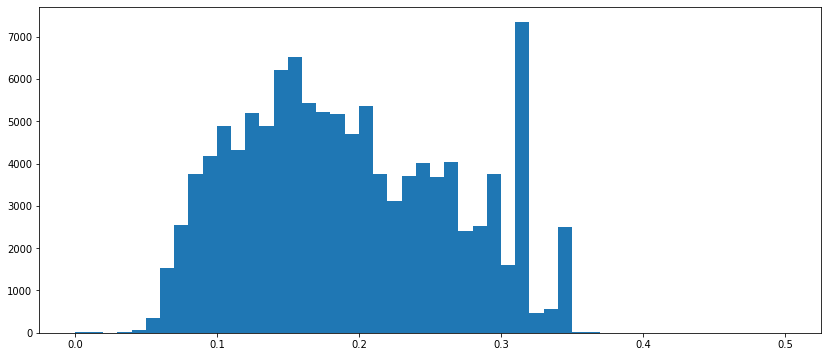

In [16]:
plt.figure(figsize=[14,6])
plt.hist(data= loan, x = 'BorrowerRate', bins= bins);

This graph shows the distribution of the Borrower APR

### Visualization 4

In [95]:
#Describing loan amount to get an idea for bin edges
loan['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [96]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1000,4000,6500,12000,20000,35000]
# Labels for the four followership categories
bin_names =["<=4k",'<=6.5k','<=12k','<=20k','<=35k']
loan['loan_amt'] = pd.cut(loan['LoanOriginalAmount'], bin_edges, labels = bin_names)

In [97]:
loan['loan_amt'].value_counts()

<=4k      39192
<=12k     28793
<=20k     21624
<=6.5k    15837
<=35k      5285
Name: loan_amt, dtype: int64

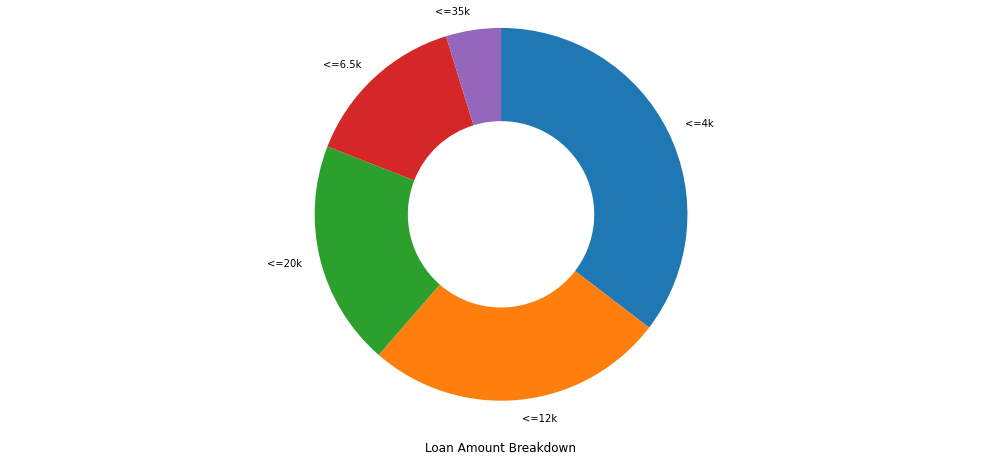

In [117]:
#Plotting donut graph
sorted_amt = loan['loan_amt'].value_counts()

plt.figure(figsize=[14,6])
plt.pie(sorted_amt, labels = sorted_amt.index, startangle= 90,
       counterclock = False, wedgeprops = {'width': 0.5});
plt.axis('square')
plt.axis('equal')
plt.tight_layout()
plt.title('Loan Amount Breakdown', y =-0.1)
plt.show();

Majority of the loans are below 12k

### Visualization 5

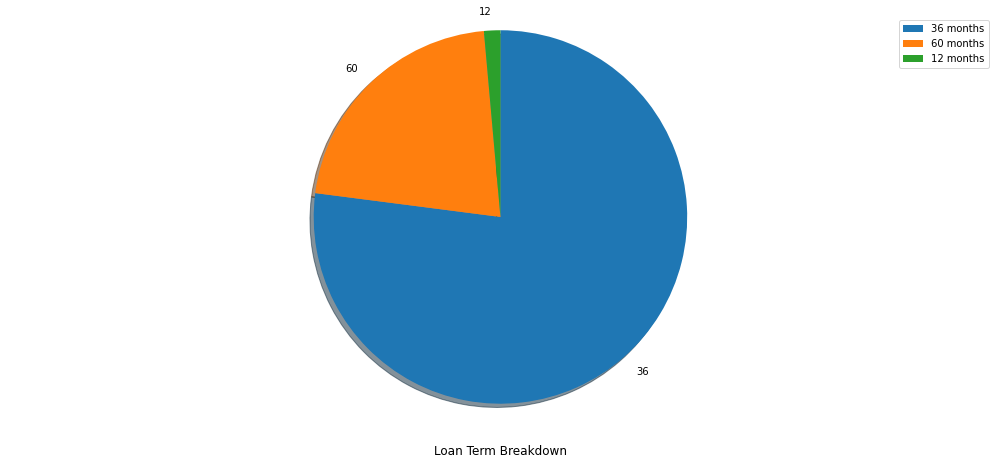

In [119]:
#Plotting donut graph
sorted_counts = loan['Term'].value_counts()

plt.figure(figsize=[14,6])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle= 90,
       counterclock = False, shadow = True);
plt.axis('square');
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
labels=['36 months','60 months', '12 months']
plt.legend(labels);
plt.title('Loan Term Breakdown', y =-0.1);

36 month is the preferred loan term among borrowers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

   1. Visualization 2: 
   
       a. I wanted to use fico score credit rating so I mapped the fico score category to the credit score in the data set 
      
       b. There was a band of scores provided in the dataset so I took the average of them and then started mapping 
       
       
   2. Visualization 3:
      
       c. Borrower rate has bimodal distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

   1. Visualization 1: 
   
       a. Sorted the loan status based on value_counts
       
       
   2. Visualization 4:
        
        a. I created categories by breaking down the LoanOriginalAMount into bins and edges 
        
        
   3. Visualization 5:
    
        a. Performed sorting of the loan term so that it is sorted in descending order

## Bivariate Exploration

### Bivariate Visualization 1

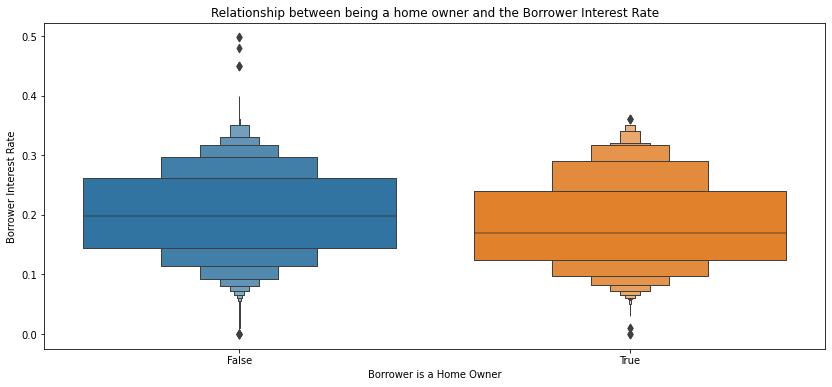

In [28]:
plt.figure(figsize=[14,6])
plt.title('Relationship between being a home owner and the Borrower Interest Rate')
sb.boxenplot(data=loan, x='IsBorrowerHomeowner', y='BorrowerRate');
plt.xlabel('Borrower is a Home Owner');
plt.ylabel('Borrower Interest Rate');

Clearly home ownership lowers credit risk since it can be used a collateral as can be seen by the interest rates offered to home owners

### Bivariate Visualization 2

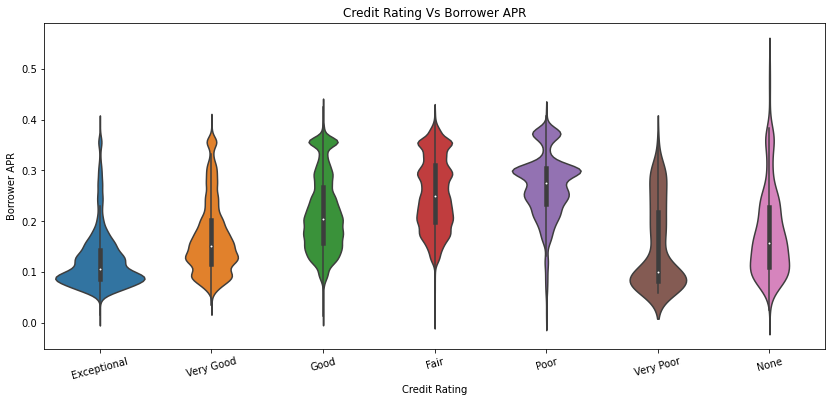

In [33]:
#Plotting credit score rating vs borrower APR via violin plot
plt.figure(figsize=[14,6])
sb.violinplot(data=loan, x = 'sorted_rating', y='BorrowerAPR')
plt.xticks(rotation=15)
plt.xlabel('Credit Rating')
plt.ylabel('Borrower APR')
plt.title('Credit Rating Vs Borrower APR');

Here, we can see that the good ratings get better interest APR but Very Poor rating seems to have a good borrower APR which needs further investigation

### Bivariate Visualization 3 

In [34]:
#Creating a separate loan dataframe with specific status
loan_stat = loan.loc[((loan.LoanStatus == 'Completed') | (loan.LoanStatus == 'Defaulted'))]

In [35]:
#Creating a function to sort the data based on the rating 
def sorting_credit_rating(data):
    sorted_rating = ['Exceptional','Very Good','Good', 'Fair', 'Poor','Very Poor', 'None']
    cuts = pd.api.types.CategoricalDtype(ordered=True, categories =sorted_rating)
    data['sorted_rating'] = data['credit_score_rating'].astype(cuts)

In [36]:
sorting_credit_rating(loan_stat);

<ipython-input-35-0ef2689cd2aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sorted_rating'] = data['credit_score_rating'].astype(cuts)


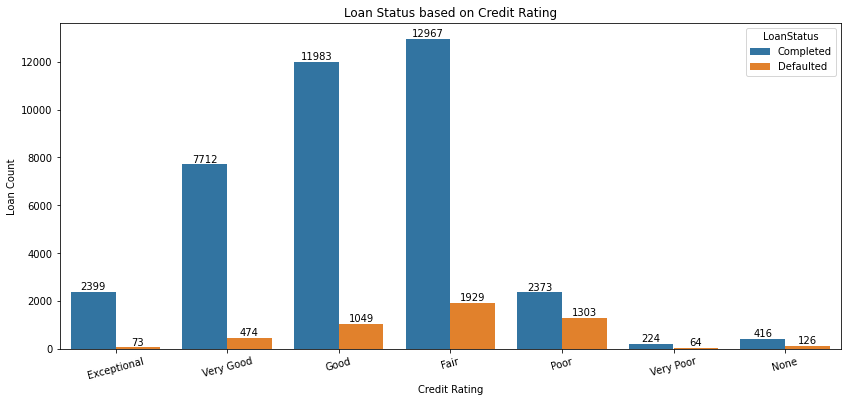

In [37]:
plt.figure(figsize=[14,6])
plot= sb.countplot(data = loan_stat, x = 'sorted_rating', hue = 'LoanStatus');
#patches contains the bar information
#loop over every bar 
for bar in plot.patches:
    #annotate
    plt.annotate(f"{bar.get_height():.0f}",
                 (bar.get_x() + bar.get_width()/2, bar.get_height()),
                 va = 'bottom', ha='center')
plt.xticks(rotation=15);
plt.xlabel('Credit Rating')
plt.ylabel('Loan Count')
plt.title('Loan Status based on Credit Rating');

This plot gives us the glimpse of Default/Completion of loans based on credit ratings

### Bivariate Visualization 4

In [38]:
loan['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

/Users/satyamchauhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


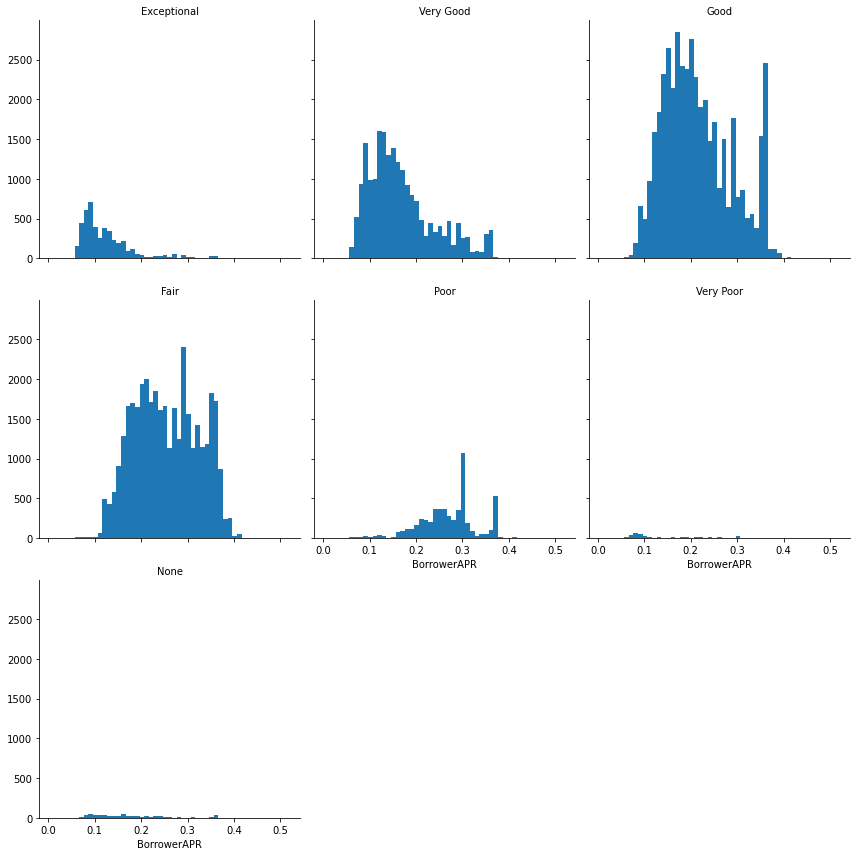

In [39]:
#plotting facetgrid with credit rating vs borrowers apr
g = sb.FacetGrid(data=loan, col='sorted_rating', col_wrap = 3, size =4)
g.map(plt.hist, 'BorrowerAPR', bins = np.arange(0.00653, loan['BorrowerAPR'].max()+0.01, 0.01)) 
g.set_titles('{col_name}');

This shows the distribution of borrower apr for different credit rating scores where most of them are skewed

### Bivariate Visualization 5

In [40]:
#Getting Income range
loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [41]:
#Adding an income band categorical column based on IncomeRange
income_band =[]
#creating a for loop for the transformation
for value in loan['IncomeRange']:
    if value == '$0':
        income_band.append('No Income')
    elif value == '$1-24,999':
        income_band.append('Very Low')
    elif value == '$25,000-49,999':
        income_band.append('Low')
    elif value == '$50,000-74,999':
        income_band.append('Medium')
    elif value == '$75,000-99,999':
        income_band.append('High')
    elif value == '$100,000+':
        income_band.append('Very High')
    elif value == 'Not employed':
        income_band.append('Unemployed')
    else:
        income_band.append('No Data')
loan['income_band'] = income_band

In [42]:
#sorting the income based on high to low
sorted_income = ['Very High','High','Medium', 'Low', 'Very Low','Unemployed', 'No Income', 'No Data']
cuts = pd.api.types.CategoricalDtype(ordered=True, categories =sorted_income)
loan['sorted_income'] = loan['income_band'].astype(cuts)

In [43]:
#Checing sorting of the income range
loan['sorted_income'].value_counts()

Low           32192
Medium        31050
Very High     17337
High          16916
No Data        7741
Very Low       7274
Unemployed      806
No Income       621
Name: sorted_income, dtype: int64

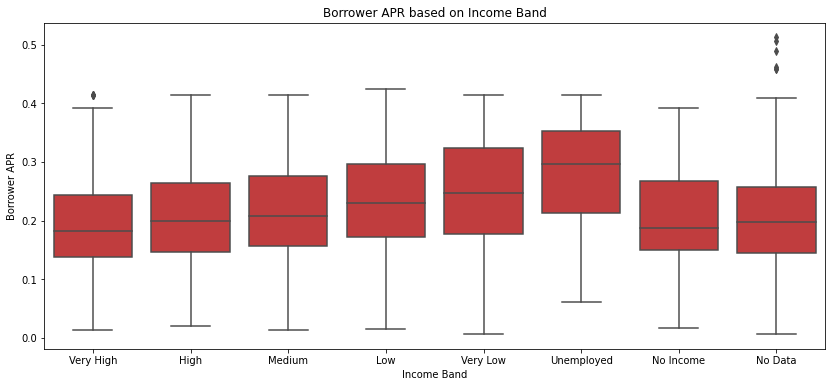

In [44]:
# Plotting a box plot to visualize variations in APR based on Income band
plt.figure(figsize=[14,6])
base_color = sb.color_palette()[3]
sb.boxplot(data = loan, x = 'sorted_income', y = 'BorrowerAPR', color = base_color);
plt.xlabel('Income Band')
plt.ylabel('Borrower APR')
plt.title('Borrower APR based on Income Band');

This shows that income bands with very high and no income (students) receive favorable interest rates 

### Bivariate Visualization 6

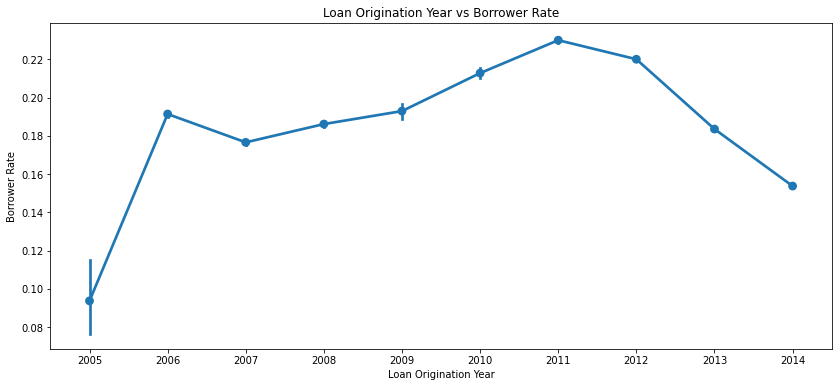

In [45]:
#Plotting Loan Origination Year vs Borrower Rate
plt.figure(figsize=[14,6])
loan['year'] = pd.to_datetime(loan['LoanOriginationDate']).dt.year
# same as above, only different type plot
sb.pointplot(data = loan, x = 'year',
              y = 'BorrowerRate')
plt.xlabel('Loan Origination Year')
plt.ylabel('Borrower Rate')
plt.title('Loan Origination Year vs Borrower Rate');

This insight shows the interest rate changes over the years. This interest rate was low before the 2008 financial crash and we can see that increasing trend in the ionterest rate

### Bivariate Visualization 7

In [51]:
#Checking value_counts for different types of loans  
loan['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [74]:
#Adding a loan_reason categorical column based on ListingCategory (numeric)
loan_reason =[]
#creating a for loop for the transformation
for value in loan_stat['ListingCategory (numeric)']:
    if value == 1:
        loan_reason.append('Debt Consolidation')
    elif value == 0:
        loan_reason.append('Not Available')
    elif value == 7:
        loan_reason.append('Other')
    elif value == 2:
        loan_reason.append('Home Improvement')
    elif value == 3:
        loan_reason.append('Business')
    elif value == 6:
        loan_reason.append('Auto')
    elif value == 4:
        loan_reason.append('Personal Loan')
    elif value == 13:
        loan_reason.append('Household Expenses')
    elif value == 15:
        loan_reason.append('Medical/Dental')        
    else:
        loan_reason.append('Miscellaneous')
loan_stat['loan_reason'] = loan_reason

<ipython-input-74-7d5efccc413c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_stat['loan_reason'] = loan_reason


In [75]:
loan_stat['loan_reason'].value_counts()

Debt Consolidation    14212
Not Available         13156
Other                  4817
Business               3149
Home Improvement       2575
Personal Loan          1818
Miscellaneous          1450
Auto                   1269
Household Expenses      394
Medical/Dental          252
Name: loan_reason, dtype: int64

In [79]:
#creating a function to label bars
def label_bar(x):
    for bar in x.patches:
    #annotate
        plt.annotate(f"{bar.get_height():.0f}",
                     (bar.get_y() + bar.get_width()/2, bar.get_height()),
                     va = 'bottom', ha='center')

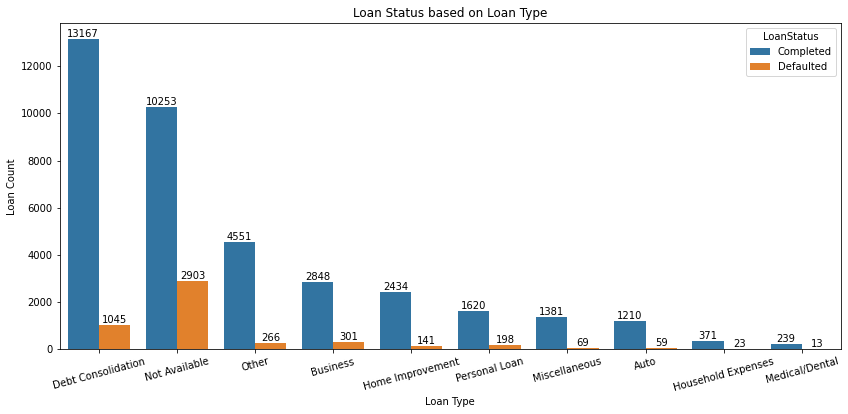

In [125]:
#Plotting bar graph to visualize top laon types with their status
plt.figure(figsize=[14,6])
freq_loan_type = loan_stat['loan_reason'].value_counts()
gen_order = freq_loan_type.index
base_color= sb.color_palette()[9]
plot = sb.countplot(data=loan_stat, x = 'loan_reason', order = gen_order, hue = 'LoanStatus');
label_bar(plot)
plt.xticks(rotation = 15);
plt.xlabel('Loan Type')
plt.ylabel('Loan Count')
plt.title('Loan Status based on Loan Type');

This shows us that debt consolidation is the top loan type followed business and home improvement

### Bivariate Visualization 8

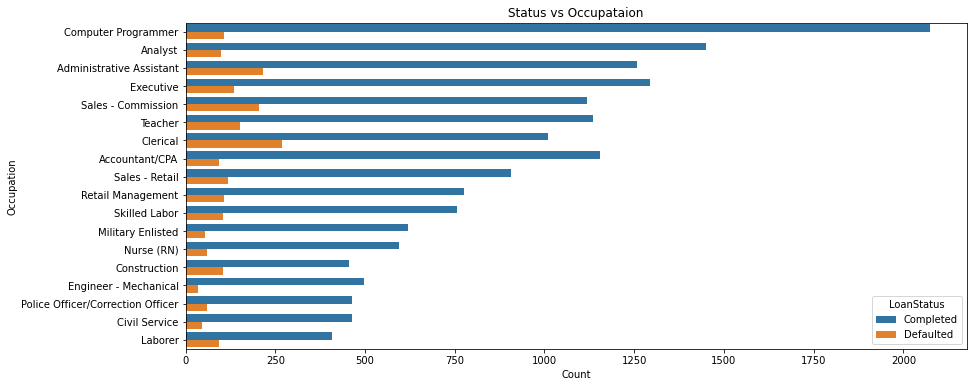

In [94]:
#Plotting professions with their loan status
order_type = loan_stat['Occupation'].value_counts().index[2:20]
plt.figure(figsize=[14,6])
plot = sb.countplot(data = loan_stat, y = 'Occupation', hue = 'LoanStatus', order = order_type);
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Status vs Occupataion');

This shows Prosper's top customers are computer proggrammers, Analyst, and Admin Assistant

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

   1. Visualization 1:
   
        a. home ownership lowers credit risk since it can be used a collateral as can be seen by the interest rates offered to home owners
        
   
   2. Visualization 2:
    
        a.  Good ratings get better interest APR but Very Poor rating seems to have a good borrower APR which needs further investigation
        
    
   3. Visualization 3:
        
        a. This plot gives us the glimpse of Default/Completion of loans based on credit ratings
        
   
   4. Visualization 4:
   
       a. The distribution of borrower apr for different credit rating scores where most of them are skewed
       
   
   5. Visualziation 6:
   
        a. This insight shows the interest rate changes over the years. This interest rate was low before the 2008 financial crash and we can see that increasing trend in the ionterest rate
        
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

   1. Visualization 5:
   
       a. The Income bands with very high and no income (students) receive favorable interest rates

   2. Visualization 7:
       
       a. Debt consolidation is the top loan type followed business and home improvement
       
    
   3. Visualization 8:
    
       a. Prosper's top customers are computer proggrammers, Analyst, and Admin Assistant

## Multivariate Exploration

### Multivariate Visualization 1

In [46]:
#Creating random sample of 200 to avoid overplotting
np.random.seed()
sample = np.random.choice(loan.shape[0],200, replace = False)
loan_sample = loan.loc[sample]

Text(0.5, 1.0, 'Loan Status based on APR and On ')

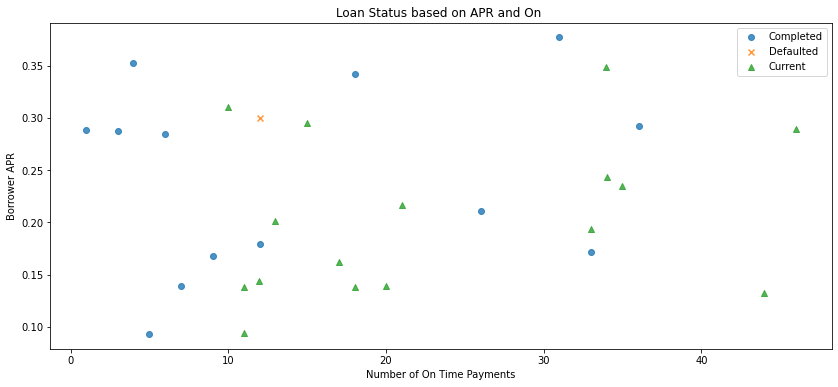

In [47]:
#Plotting Loan Status based on APR and On Time Payments
plt.figure(figsize=[14,6])
ttype_markers = [['Completed','o'],
                ['Defaulted','x'],
                 ['Current','^']]

for ttype, marker in ttype_markers:
    plot_data = loan_sample.loc[loan_sample['LoanStatus'] == ttype]
    sb.regplot(data =plot_data, x='OnTimeProsperPayments', y='BorrowerAPR',
              x_jitter = 0.04, fit_reg = False, marker = marker)
plt.xlabel('Number of On Time Payments')
plt.ylabel('Borrower APR')
plt.legend(['Completed','Defaulted','Current'])
plt.title('Loan Status based on APR and On ')

This tells us that loans with on time payment lower than 10 could default whereas higher on time payment have lower interest rate except few exceptiosn which needs further investigation

### Multivariate Visualization 2

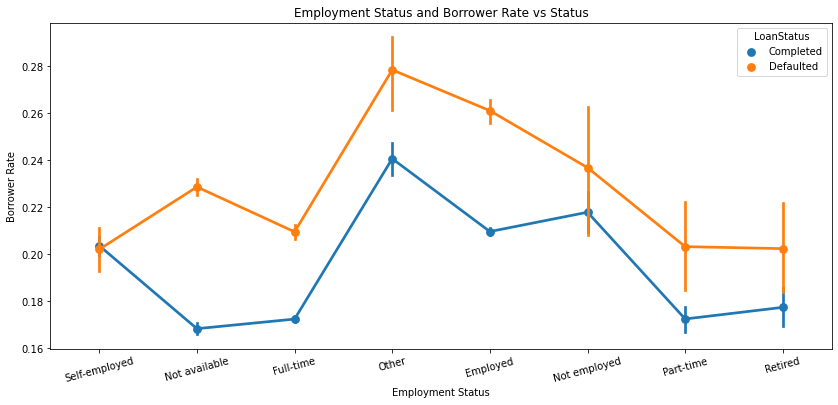

In [48]:
plt.figure(figsize=[14,6])
sb.pointplot(data = loan_stat, y = 'BorrowerRate', 
            x = 'EmploymentStatus', hue = "LoanStatus");

plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.title('Employment Status and Borrower Rate vs Status');
plt.xticks(rotation = 15);

This is a very interesting insight since it shows that the loans that defaulted had higher interest rate for than the ones that were successfully paid off maybe some factors led to the increase in interest rate whihc in turn caused the default

### Multivariate Visualization 3

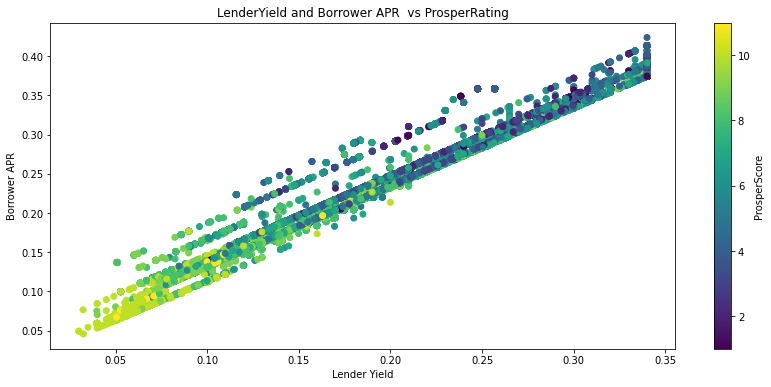

In [49]:
#Plotting LenderYield and Borrower APR  vs ProsperRating
plt.figure(figsize=[14,6])
plt.scatter(data=loan,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR')
plt.title('LenderYield and Borrower APR  vs ProsperRating');

This shows the obvious relation between Borrower's APR, Lender's yeild and and prosper score rating. 

The borrower's interest and lenders yeild increases with deteriorating rating since it increases the investor's risk

### Multivariate Visualization 4

In [126]:
#Creating random sample of 200 to avoid overplotting
np.random.seed()
sample = np.random.choice(loan.shape[0],200, replace = False)
loan_sample = loan.loc[sample]

Text(0.5, 1.0, 'Loan Amount Vs APR with Income Category')

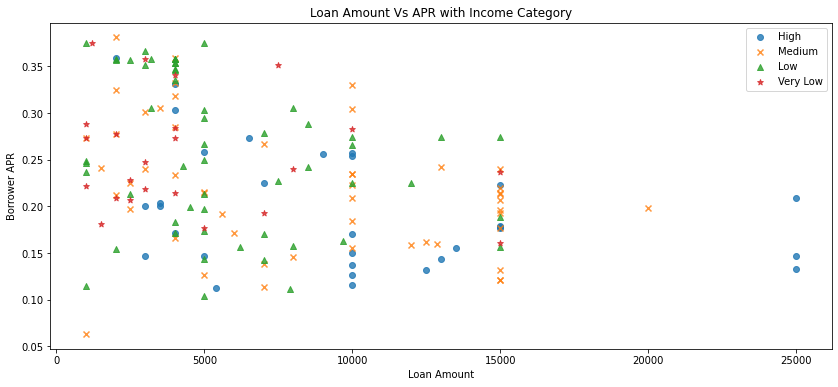

In [127]:
#Plotting Loan Amount Vs APR with Income Category
plt.figure(figsize=[14,6])
#Plotting Shapes
ttype_markers = [['High','o'],
                ['Medium','x'],
                 ['Low','^'],
                ['Very Low','*']]

for ttype, marker in ttype_markers:
    plot_data = loan_sample.loc[loan_sample['sorted_income'] == ttype]
    sb.regplot(data =plot_data, x='LoanOriginalAmount', y='BorrowerAPR',
              x_jitter = 0.04, fit_reg = False, marker = marker)
#Labeling
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR')
plt.legend(['High','Medium','Low', 'Very Low'])
plt.title('Loan Amount Vs APR with Income Category')

We can see loan amount granted increases with income level

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

   1. Visualization 1:
   
       a. loans with on time payment lower than 10 could default whereas higher on time payment have lower interest rate except few exceptiosn which needs further investigation
       

   2. Visualization 2:
   
       a. It shows that the loans that defaulted had higher interest rate for than the ones that were successfully paid off maybe some factors led to the increase in interest rate which in turn caused the default
       
       
   3. Visualziation 3:
   
       a. The borrower's interest and lenders yeild increases with deteriorating rating since it increases the investor's risk 

### Were there any interesting or surprising interactions between features?

   1. Visualization 4:
   
        a. Loan amount requested by the applicants is dependent on their income range. 

## Conclusions

1. Top loan types are:
        a. Debt Consolidation 
        b. Business
        c. Home Improvement 
2. Top Profesions based on Customers:
        a. Programmers
        b. Analyst
        c. Admin Assistant
3. Majority of the applicants have Good and Fair rating
4. Home ownership, Income range, Previous On time payments can get you a better Borrowers APR